## CIFAR10 small images classification By Alan Altonchi
**Day 3 of learning how to use TensorFlow and what Machine Learning is**

Dataset: https://keras.io/api/datasets/cifar10/

This is a **Multi-Class Classification**, the inputs are 32x32 color images, the output is what the model predicts the image to be which can be anything between `0` and `9`

`0`	airplane

`1`	automobile

`2`	bird

`3`	cat

`4`	deer

`5`	dog

`6`	frog

`7`	horse

`8`	ship

`9`	truck

**Introduction:** Hello, my name is Alan, I am a passionate self-taught programmer that loves learning new things. This is my journey as I'm learning about **Machine Learning** and how to make use of its subfield **Deep Learning**. I will do so by learning how to use **TensorFlow** from scratch.

## Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, losses, optimizers, callbacks, layers
import matplotlib.pyplot as plt
import random
import pandas as pd

## Gather data

In [2]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.cifar10.load_data()

## Structure the data

In [3]:
train_data, test_data = tf.constant(train_data), tf.constant(test_data)
train_labels, test_labels = tf.squeeze(train_labels), tf.squeeze(test_labels)

In [4]:
class_names = ['airplane',
    'automobile',
    'bird',
    'cat',
	'deer',
	'dog',
	'frog',
	'horse',
	'ship',
	'truck']

## Understand the data

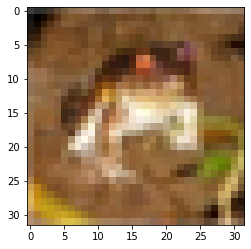

In [5]:
plt.imshow(train_data[0])

In [6]:
class_names[train_labels[0]]

'frog'

In [7]:
train_data[0].shape, train_labels[0].shape

(TensorShape([32, 32, 3]), TensorShape([]))

## Normalize the data

In [8]:
train_data[0].numpy().max()

255

In [9]:
train_data = tf.cast(train_data,tf.dtypes.float32) / 251.0
test_data = tf.cast(test_data,tf.dtypes.float32) / 251.0

In [10]:
train_data[0][:5]

<tf.Tensor: shape=(5, 32, 3), dtype=float32, numpy=
array([[[0.23505977, 0.24701196, 0.25099602],
        [0.17131475, 0.18326694, 0.17928287],
        [0.1992032 , 0.19123507, 0.17131475],
        [0.27091634, 0.21513945, 0.16733068],
        [0.39043826, 0.29083666, 0.20717132],
        [0.4741036 , 0.3625498 , 0.25099602],
        [0.55378485, 0.42629483, 0.2988048 ],
        [0.57768923, 0.43824703, 0.3187251 ],
        [0.5936255 , 0.46613547, 0.35458168],
        [0.5936255 , 0.47808766, 0.37051794],
        [0.52191234, 0.41035858, 0.30677292],
        [0.49800798, 0.39442232, 0.30278885],
        [0.56573707, 0.45816734, 0.3625498 ],
        [0.5737052 , 0.44621515, 0.3426295 ],
        [0.5458167 , 0.4183267 , 0.31474105],
        [0.5139442 , 0.3864542 , 0.28286853],
        [0.5458167 , 0.42231077, 0.31474105],
        [0.53386456, 0.42231077, 0.30278885],
        [0.49402392, 0.3864542 , 0.2549801 ],
        [0.55378485, 0.45019922, 0.31075698],
        [0.55378485, 0.44621

## Create the model

In [13]:
model = Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(loss=losses.SparseCategoricalCrossentropy(),
              optimizer=optimizers.Adam(),
              metrics='accuracy')

In [14]:
history = model.fit(train_data, 
                    train_labels, 
                    epochs=50,
                    validation_data=(test_data, test_labels))

Epoch 1/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8805 - accuracy: 0.3125 - val_loss: 1.7576 - val_accuracy: 0.3661
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7212 - accuracy: 0.3772 - val_loss: 1.6638 - val_accuracy: 0.3947
Epoch 3/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6340 - accuracy: 0.4109 - val_loss: 1.5766 - val_accuracy: 0.4319
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5862 - accuracy: 0.4273 - val_loss: 1.6062 - val_accuracy: 0.4275
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5466 - accuracy: 0.4410 - val_loss: 1.5230 - val_accuracy: 0.4515
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5170 - accuracy: 0.4540 - val_loss: 1.5015 - val_accuracy: 0.4576
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4909 - accuracy: 0.4643 - val_loss: 1.5343 - val_accuracy:

In [15]:
model.evaluate(test_data, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 1.5782 - accuracy: 0.4749


[1.578156590461731, 0.4749000072479248]

I cannot reach over 50% accuracy, further experimentation required...